# [**Sous-ajustement vs Sur-ajustement**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/3_model_selection/plot_underfitting_overfitting.ipynb)<br/>([_Underfitting vs. Overfitting_](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html))

Cet exemple illustre les problèmes de sous-ajustement (underfitting) et de sur-ajustement (overfitting), ainsi que la manière dont nous pouvons utiliser la régression linéaire avec des caractéristiques polynomiales pour approximer des fonctions non linéaires. Le graphique montre la fonction que nous voulons approximer, qui est une partie de la fonction cosinus. De plus, les échantillons de la vraie fonction et les approximations de différents modèles sont affichés. Les modèles utilisent des caractéristiques polynomiales de degrés différents. Nous pouvons constater qu'une fonction linéaire (polynomiale de degré 1) n'est pas suffisante pour ajuster les échantillons d'entraînement. Cela s'appelle **sous-ajustement** (underfitting). Un polynôme de degré 4 approxime presque parfaitement la vraie fonction. Cependant, pour des degrés plus élevés, le modèle va **sur-ajuster** (overfit) les données d'entraînement, c'est-à-dire qu'il apprend le bruit des données d'entraînement. Nous évaluons quantitativement le **sur-ajustement / sous-ajustement** (overfitting / underfitting) en utilisant la validation croisée. Nous calculons l'erreur quadratique moyenne (MSE) sur l'ensemble de validation, plus elle est élevée, moins le modèle généralise correctement à partir des données d'entraînement.

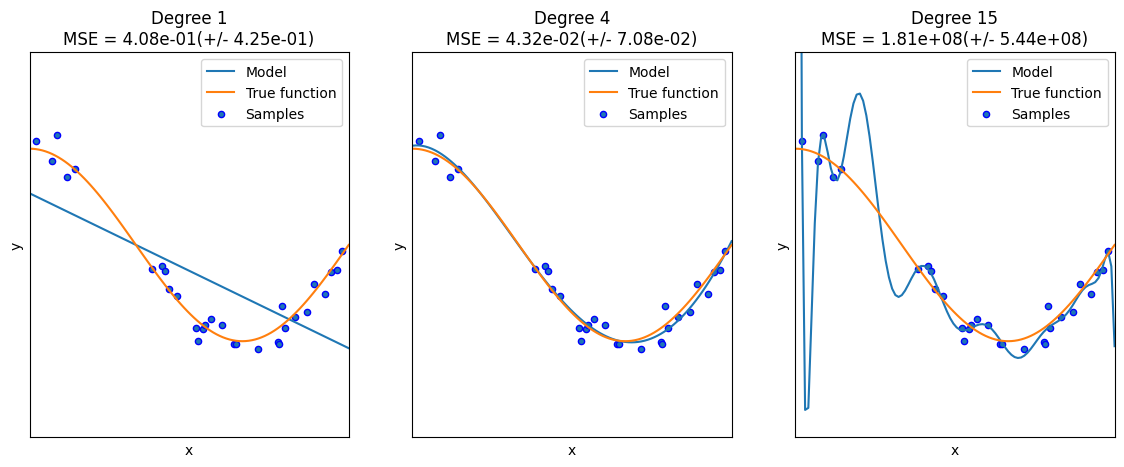

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()